In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Question 1: Perceptron implentation

In [2]:
def points_sign(point):
    if(point[0] - point[1] > 0):
        return 1
    else:
        return 0

def get_tag(number): 
    if number > 0:
        return 1
    else:
        return 0

In [3]:
def perceptron(points_matrix, tags_vector, weight_init=0):
    changed = True
    weight_vector = np.repeat(float(weight_init), points_matrix.shape[0])
    while changed:
        changed = False
        for idx, point in enumerate(points_matrix.T):
          if get_tag(point @ weight_vector) != tags_vector[idx]:
            if tags_vector[idx] == 0:
              weight_vector -= point
            else:
              weight_vector += point
            changed = True
    return weight_vector


Question 2 - workaround with sample data

In [4]:
def get_sample_data(n, P):
    points = np.random.uniform(low=-10, high=10, size=(n, P))
    tags = np.apply_along_axis(points_sign, axis=0, arr=points)
    return points, tags


In [5]:
points_matrix, tags = get_sample_data(n=2, P=1000)
data = np.row_stack((points_matrix, tags))
blues = data[:, data[2, :] == 1]
reds = data[:, data[2, :] == 0]

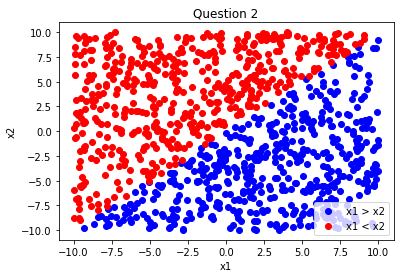

In [6]:
fig, ax = plt.subplots()
ax.scatter(blues[0, :], blues[1, :], c='blue', label='x1 > x2')
ax.scatter(reds[0, :], reds[1, :], c='red', label='x1 < x2')
ax.title.set_text("Question 2")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.legend()
plt.show()

Question 3 - apply perceptron implentation on question 2 results

In [7]:
weights = perceptron(points_matrix, tags, weight_init=1)

In [8]:
sepetation_incline = -1 / (weights[1] / weights[0])
start_x, start_y = -10 , -10
y_by_x_coefficient = (10 - start_x) * sepetation_incline + start_y

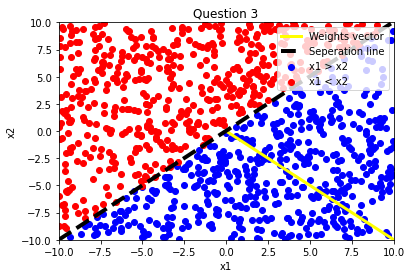

In [9]:
fig, ax = plt.subplots()
ax.scatter(blues[0, :], blues[1, :], c='blue', label='x1 > x2')
ax.scatter(reds[0, :], reds[1, :], c='red', label='x1 < x2')
ax.plot([0, (weights)[0]], [0, (weights)[1]],
        linewidth=3, c="yellow", label="Weights vector")
ax.plot([start_x, 10], [start_y, y_by_x_coefficient], c="black",
        linewidth=4, label="Seperation line", linestyle="--")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.title.set_text("Question 3")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.legend()
plt.show()


Question 4 - Simulations on perceptron implentation 

In [10]:
size_options = np.array([5, 20, 30, 50, 100, 150, 200, 500])
simulations = pd.DataFrame(np.repeat(size_options, 100), columns=['size'])
optimal_weights = np.array([1,-1])
simulations[["points","tag"]] = pd.DataFrame(simulations['size'].apply(lambda p: get_sample_data(n=2, P=p)).tolist())

In [11]:
def get_unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between_vectors(v1, v2):
    v1_unit = get_unit_vector(v1)
    v2_unit = get_unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1.0, 1.0))

def compute_error(points, label):
    weight_vector = perceptron(points, label, weight_init=1)
    return np.rad2deg(angle_between_vectors(weight_vector, optimal_weights))

In [12]:
simulations['error'] = simulations.apply(
    lambda row: compute_error(row["points"], row["tag"]), axis=1)


In [13]:
error_means = []
for option in size_options:
    error_means.append(
        simulations.loc[simulations['size'] == option, "error"].mean())

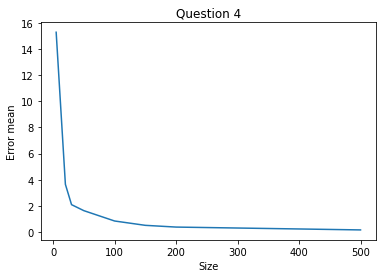

In [14]:
plt.plot(size_options, error_means)
plt.title("Question 4")
plt.xlabel("Size")
plt.ylabel("Error mean")
plt.show()